In [153]:
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

df=pd.read_csv("./data/training_dataset.csv",low_memory=False)
df.match_date = df.match_date.apply(lambda x:datetime.strptime(x, '%Y-%m-%d'))

In [154]:
df

,player1_name,player1_atprank,player2_name,player2_atprank,match_date,match_location,match_tournament,match_surface,match_odd_player1,match_odd_player2,winner_player1
0,Harrison R.,433.0,Mager G.,91.0,2021-01-07,Delray Beach,Delray Beach Open,Hard,1.72,2.00,0
1,Kwon S.W.,82.0,Korda S.,213.0,2021-01-07,Delray Beach,Delray Beach Open,Hard,2.00,1.72,0
2,Paul T.,55.0,Nam J.S.,NaN,2021-01-07,Delray Beach,Delray Beach Open,Hard,1.12,6.00,1
3,Travaglia S.,74.0,Kecmanovic M.,42.0,2021-01-07,Antalya,Antalya Open,Hard,2.62,1.44,1
4,Monteiro T.,84.0,Bellucci T.,278.0,2021-01-07,Delray Beach,Delray Beach Open,Hard,1.36,3.00,1
...,...,...,...,...,...,...,...,...,...,...,...
7057,Tiafoe F.,64.0,Evans D.,31.0,2023-08-05,Washington,Citi Open,Hard,1.29,3.75,0
7058,Griekspoor T.,172.0,Fritz T.,29.0,2023-08-06,Washington,Citi Open,Hard,3.50,1.30,1
7059,Tsitsipas S.,6.0,De Minaur A.,25.0,2023-08-06,Los Cabos,Los Cabos Open,Hard,1.36,3.20,1
7060,Evans D.,31.0,Dimitrov G.,20.0,2023-08-06,Washington,Citi Open,Hard,3.20,1.36,1


In [155]:
df = df.dropna()

In [156]:
from sklearn.model_selection import train_test_split

X = df.drop(["player1_name", "player2_name","match_location", "match_tournament", "match_surface", "winner_player1"],axis=1)
y = df.winner_player1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [157]:
X_test

,player1_atprank,player2_atprank,match_date,match_odd_player1,match_odd_player2
5486,20.0,49.0,2023-02-15,1.67,2.20
6285,109.0,199.0,2023-05-14,1.73,2.10
6567,25.0,115.0,2023-06-20,2.20,1.67
1148,98.0,209.0,2021-05-30,3.50,1.30
2623,66.0,367.0,2022-01-17,1.50,2.62
...,...,...,...,...,...
1001,70.0,103.0,2021-05-11,1.40,3.00
1727,310.0,66.0,2021-07-28,1.57,2.37
5821,105.0,202.0,2023-03-23,3.40,1.33
4878,3.0,91.0,2022-10-12,1.40,3.00


In [166]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

X_train_filtered = X_train.drop("match_date",axis=1)
X_test_filtered = X_test.drop("match_date",axis=1)
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X_train_filtered, y_train)

#cross_val_score(dtree, X_test, y_test, cv=10)

y_predict = dtree.predict(X_test_filtered)

accuracy_score(y_predict, y_test)

0.5907928388746803

In [167]:
# ROI return of investment

print("We bet 1€ on all test matches")
df_roi = X_test.copy()
df_roi["y_predict"] = y_predict
df_roi["y_test"]=y_test

money_invested=df_roi.shape[0]
print("money spent:", money_invested,"€")

money_won = 0.0
for index, row in (df_roi[y_predict == y_test]).iterrows():
    if row.y_predict == 0 :
        money_won += row.match_odd_player2
    else:
        money_won += row.match_odd_player1

print("money won:",round(money_won,2),"€")
print("TOTAL:", round(money_won,2) - money_invested,"€")

We bet 1€ on all test matches
money spent: 1173 €
money won: 1128.77 €
TOTAL: -44.23000000000002 €


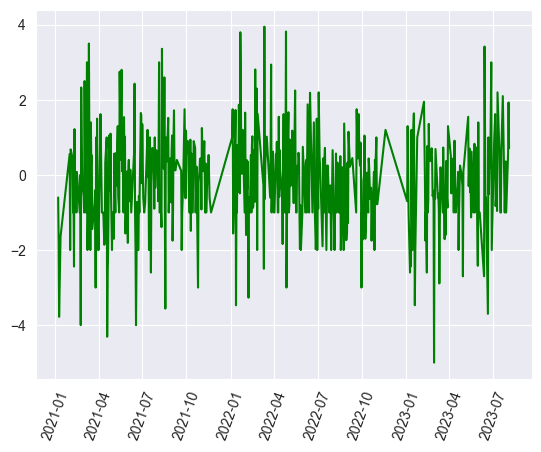

In [149]:
import matplotlib.pyplot as plt

df_roi = df_roi.sort_values(by='match_date')
dates = df_roi.match_date.unique()
data = []

for date in dates :
    money_won = 0.0
    #test = df_roi.at[df_roi.index[0],"match_date"]
    df_roi_filtered = df_roi.loc[df_roi["match_date"]==date]
    #print(df_roi_filtered)
    money_won-=df_roi_filtered.shape[0]

    for index, row in (df_roi_filtered.loc[df_roi_filtered["y_predict"] == df_roi_filtered["y_test"]]).iterrows():
        if row.y_predict == 0 :
            money_won += row.match_odd_player2
        else:
            money_won += row.match_odd_player1

    data.append(money_won)

dates = dates.astype('datetime64[ns]')

plt.plot_date(pd.to_datetime(dates.date, format='%Y-%m-%d'), data, 'g')
plt.xticks(rotation=70)
plt.show()


d = {'date': dates.date, 
     'money_won': data}
roi = pd.DataFrame(data=d)

In [150]:
roi.sort_values(by="money_won")

,date,money_won
448,2023-02-28,-5.00
59,2021-04-19,-4.31
20,2021-02-23,-4.00
107,2021-06-18,-4.00
2,2021-01-09,-3.78
...,...,...
504,2023-06-13,3.42
34,2021-03-12,3.50
223,2022-01-21,3.80
286,2022-04-26,3.82


In [151]:
df_roi[df_roi["match_date"]=="2021-02-09"]

,player1_atprank,player2_atprank,match_date,match_odd_player1,match_odd_player2,y_predict,y_test
206,48.0,32.0,2021-02-09,2.00,1.80,1,0
224,116.0,36.0,2021-02-09,4.50,1.20,0,1
217,4.0,74.0,2021-02-09,1.04,13.00,1,1
205,103.0,88.0,2021-02-09,1.08,8.00,1,1
207,196.0,253.0,2021-02-09,2.75,1.44,0,0
213,70.0,31.0,2021-02-09,3.00,1.40,0,1
